             Comparing several deep learning models(single-step and multi-steps) with feature engineering.
The data considered for the study is one year hourly data taken from 100 KW solar power plant installed in Lubbock Texas, USA.
several classical and deep learning models for predicting single time stamp and multiple time stamp is built and comparision
is made based on the Mean Absolute Error value.



In [1]:
#importing important libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

import random

mpl.rcParams['figure.figsize'] = (8, 8)
mpl.rcParams['axes.grid'] = False

In [2]:
#Preprocessing data
df = pd.read_csv(r"C:\Users\ashis\Downloads\datamv.csv", usecols = [0,1,2,3,4,5,6] , parse_dates=[0], dayfirst=True)
df.head(20)



,Date Time,output,DNI,DHI,GHI,Temperature,Wind Speed
0,2010-01-01 00:00:00,0.00000,0,0,0,-1.0,3.3
1,2010-01-01 01:00:00,0.00000,0,0,0,-1.0,3.3
2,2010-01-01 02:00:00,0.00000,0,0,0,-1.0,3.4
3,2010-01-01 03:00:00,0.00000,0,0,0,-2.0,3.5
4,2010-01-01 04:00:00,0.00000,0,0,0,-2.0,3.4
5,2010-01-01 05:00:00,0.00000,0,0,0,-2.0,3.0
6,2010-01-01 06:00:00,0.00000,0,0,0,-2.0,2.8
7,2010-01-01 07:00:00,0.00000,0,0,0,-2.0,2.8
8,2010-01-01 08:00:00,1.57558,0,32,32,-1.0,3.3
9,2010-01-01 09:00:00,9.25620,18,104,109,0.0,3.8


In [3]:
#checking to see if there is any nan value
df.isnull().head(500)

,Date Time,output,DNI,DHI,GHI,Temperature,Wind Speed
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
495,False,False,False,False,False,False,False
496,False,False,False,False,False,False,False
497,False,False,False,False,False,False,False
498,False,False,False,False,False,False,False


In [4]:
#changing format of date and time
date_time = pd.to_datetime(df.pop('Date Time'), format='%d.%m.%Y %H:%M:%S')

In [5]:
#visualising the data
df.head()

,output,DNI,DHI,GHI,Temperature,Wind Speed
0,0.0,0,0,0,-1.0,3.3
1,0.0,0,0,0,-1.0,3.3
2,0.0,0,0,0,-1.0,3.4
3,0.0,0,0,0,-2.0,3.5
4,0.0,0,0,0,-2.0,3.4


In [6]:
#Looking at the statistics of dataset. 

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
output,8760.0,20.994254,28.364352,0.0,0.0,0.0,44.7193,82.8331
DNI,8760.0,289.780137,376.387998,0.0,0.0,0.0,694.0000,1049.0000
DHI,8760.0,59.170662,88.147673,0.0,0.0,2.0,95.0000,513.0000
GHI,8760.0,231.333676,315.544621,0.0,0.0,2.0,447.0000,1076.0000
Temperature,8760.0,15.648527,10.611933,-7.0,7.0,16.0,24.0000,39.0000
Wind Speed,8760.0,3.383699,1.752146,0.1,2.0,3.2,4.4000,14.2000


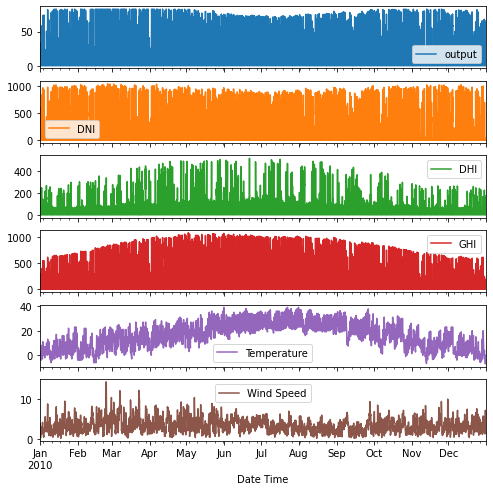

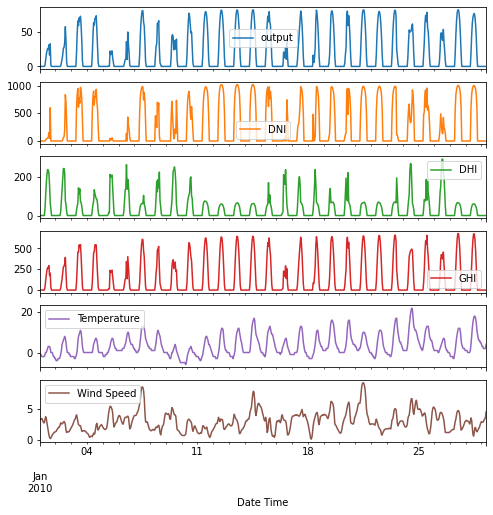

In [7]:
#visualizing the data
plot_cols = ['output', 'DNI', 'DHI', 'GHI','Temperature', 'Wind Speed']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)
plot_features = df[plot_cols][:680] #taking 680 data samples 
plot_features.index = date_time[:680]
_ = plot_features.plot(subplots=True)

                                                         Feature Engineering
Feature engineering is a machine learning technique that leverages data to create new variables that aren’t in the training set. It can produce new features for both supervised and unsupervised learning, with the goal of simplifying and speeding up data transformations while also enhancing model accuracy. Feature engineering is required when working with machine learning models. 
Regardless of the data or architecture, a terrible feature will have a direct impact on your model.
Here, days and months are cyclic data, these data are converted into x and y component dividing into sin and cos component

In [8]:
#Feature engineering
dni = df.pop('DNI')
dhi = df.pop('DHI')
ghi = df.pop('GHI')


df['Nx'] = ghi #
df['Ny'] = dhi # 

df['Hx'] = dni
#df['Dx'] = np.sin()
#df['Hy'] = np.sin(dni)

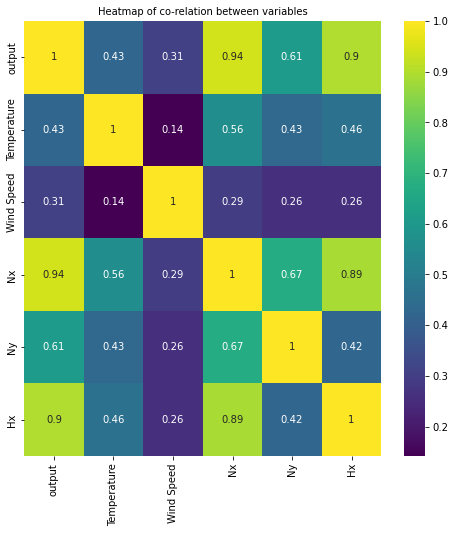

In [9]:
#visualizing the correlation
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.title('Heatmap of co-relation between variables',fontsize=10)
plt.show()

In [10]:
#converting time and date as sine and cosine form
timestamp_s = date_time.map(pd.Timestamp.timestamp)

In [11]:
day = 24*60*60
months = 30*day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['months sin'] = np.sin(timestamp_s * (2 * np.pi / months))
df['months cos'] = np.cos(timestamp_s * (2 * np.pi / months))

In [12]:
df.head(50)

,output,Temperature,Wind Speed,Nx,Ny,Hx,Day sin,Day cos,months sin,months cos
0,0.00000,-1.0,3.3,0,0,0,-4.416858e-12,1.000000e+00,-2.684946e-13,1.000000
1,0.00000,-1.0,3.3,0,0,0,2.588190e-01,9.659258e-01,8.726535e-03,0.999962
2,0.00000,-1.0,3.4,0,0,0,5.000000e-01,8.660254e-01,1.745241e-02,0.999848
3,0.00000,-2.0,3.5,0,0,0,7.071068e-01,7.071068e-01,2.617695e-02,0.999657
4,0.00000,-2.0,3.4,0,0,0,8.660254e-01,5.000000e-01,3.489950e-02,0.999391
5,0.00000,-2.0,3.0,0,0,0,9.659258e-01,2.588190e-01,4.361939e-02,0.999048
6,0.00000,-2.0,2.8,0,0,0,1.000000e+00,6.980203e-12,5.233596e-02,0.998630
7,0.00000,-2.0,2.8,0,0,0,9.659258e-01,-2.588190e-01,6.104854e-02,0.998135
8,1.57558,-1.0,3.3,32,32,0,8.660254e-01,-5.000000e-01,6.975647e-02,0.997564
9,9.25620,0.0,3.8,109,104,18,7.071068e-01,-7.071068e-01,7.845910e-02,0.996917


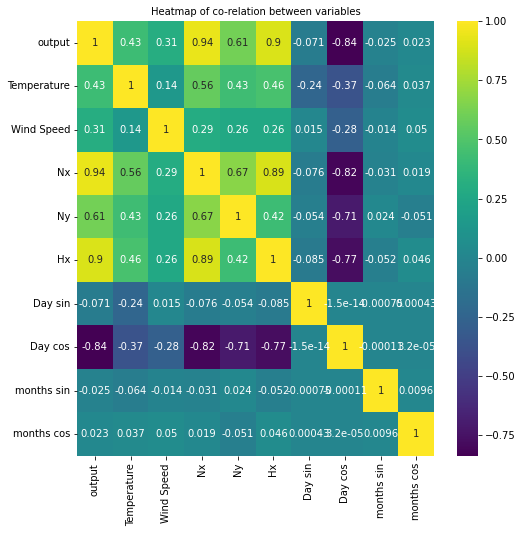

In [13]:
#visualizing the correlation after adding date and time as new feature
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.title('Heatmap of co-relation between variables',fontsize=10)
plt.show()

Text(0.5, 1.0, 'Time of day signal')

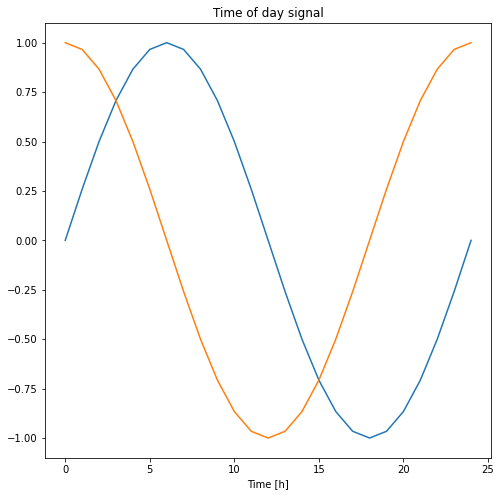

In [14]:
plt.plot(np.array(df['Day sin'])[:25])
plt.plot(np.array(df['Day cos'])[:25])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

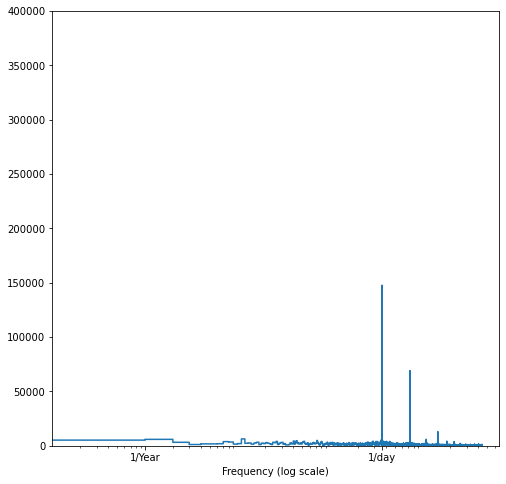

In [15]:
#checking frequency log scale
fft = tf.signal.rfft(df['output'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df['output'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 400000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

                                  Dividing the data into test and train
We'll use a (70%, 20%, 10%) split for the training, validation, and test sets.
Note the data is not being randomly shuffled before splitting

In [16]:
#splitting the data
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

                                                     Normalizing the data
It is important to scale features before training a neural network. Normalization is a common way of doing this scaling. 
Subtract the mean and divide by the standard deviation of each feature.

The mean and standard deviation should only be computed using the training data so that the
models have no access to the values in the validation and test sets.

It's also arguable that the model shouldn't have access to future values in the training 
set when training, and that this normalization should be done using moving averages. 

We have not focused this things on this code and the validation and test sets ensure that we get (somewhat) honest metrics. 
So for simplicity we uses a simple average.

In [17]:
#Normalizing the data
train_mean = train_df.mean()
train_std = train_df.std()
train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std
test_df

,output,Temperature,Wind Speed,Nx,Ny,Hx,Day sin,Day cos,months sin,months cos
7884,2.180917,-0.808865,2.768636,1.179614,-0.067032,1.897096,-0.001752,-1.414329,-0.490860,1.346116
7885,2.180719,-0.742990,2.546839,1.093200,-0.088128,1.878565,-0.367748,-1.366145,-0.479079,1.349874
7886,1.856333,-0.733580,2.325041,0.813097,-0.130320,1.796499,-0.708802,-1.224876,-0.467266,1.353530
7887,1.279354,-0.771222,1.992345,0.372086,-0.183061,1.619131,-1.001672,-1.000149,-0.455421,1.357083
7888,0.434669,-0.902971,1.271502,-0.185139,-0.309638,1.224687,-1.226399,-0.707280,-0.443546,1.360533
...,...,...,...,...,...,...,...,...,...,...
8755,-0.744820,-1.655822,0.328862,-0.766202,-0.699918,-0.797834,-1.367668,0.365765,1.142622,0.761589
8756,-0.744820,-1.749928,0.328862,-0.766202,-0.699918,-0.797834,-1.226399,0.706819,1.149222,0.751163
8757,-0.744820,-1.749928,0.217964,-0.766202,-0.699918,-0.797834,-1.001672,0.999688,1.155731,0.740679
8758,-0.744820,-1.749928,-0.003834,-0.766202,-0.699918,-0.797834,-0.708802,1.224414,1.162148,0.730140


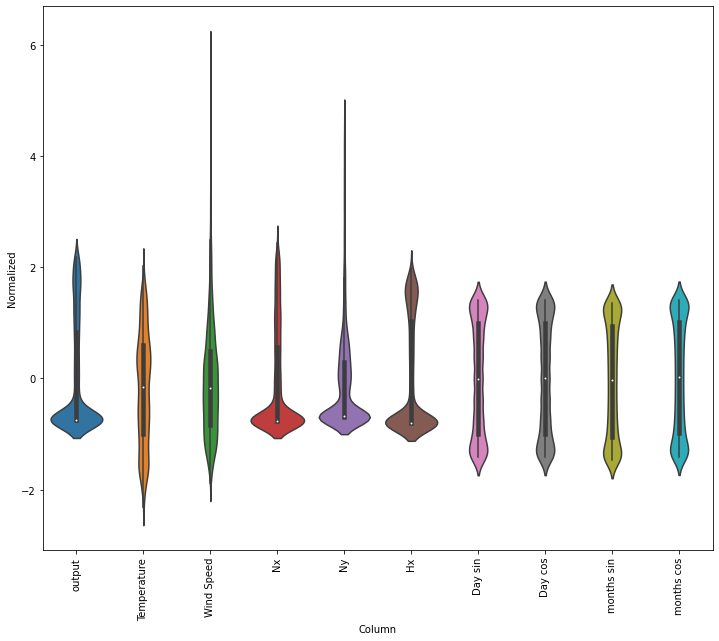

In [18]:
#visualizing the normalized data
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 10))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

                                                Data Windowing
The main features of the input windows are:

The width (number of time steps) of the input and label windows
The time offset between them.
Which features are used as inputs, labels, or both.

We have implemented various ML models including Linear, DNN, CNN and RNN models), and uses them for both:

Single-output, and multi-output predictions.
Single-time-step and multi-time-step predictions.


This section focuses on implementing the data windowing so that it can be reused for all of those models.

Start by creating the WindowGenerator class. The __init__ method includes all the necessary logic for the input and label indices.

It also takes the training, evaluation, and test DataFrames as input. These will be converted to tf.data.Datasets of windows later.

In [19]:

class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [20]:
slice(0, 10)

slice(0, 10, None)

In [21]:
np.arange(20)[slice(0, 10)]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Examples to create two different size windows 

In [22]:
w1 = WindowGenerator(input_width=24, label_width=1, shift=24,
                     label_columns=['output'])
w1

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['output']

In [23]:
w2 = WindowGenerator(input_width=6, label_width=1, shift=1,
                     label_columns=['output'])
w2

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['output']

Given a list of consecutive inputs, the split_window method will convert them to a window of inputs and a window of labels.

In [24]:
#split
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [25]:
# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])

example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 7, 10)
Inputs shape: (3, 6, 10)
Labels shape: (3, 1, 1)


Typically, data in TensorFlow is packed into arrays where the outermost index is across examples (the "batch" dimension). The middle indices are the "time" or "space" (width, height) dimension(s). The innermost indices are the features.

The code above took a batch of three 7-time step windows with 10 features at each time step. It splits them into a batch of 6-time step 10-feature inputs, and a 1-time step 1-feature label. The label only has one feature because the WindowGenerator was initialized with label_columns=['output']. 
Initially, this tutorial will build models that predict single output labels.

In [41]:
example_window 

<tf.Tensor: shape=(3, 7, 10), dtype=float64, numpy=
array([[[-7.44819686e-01, -1.74992824e+00, -1.14732890e-01,
         -7.66201869e-01, -6.99918470e-01, -7.97834188e-01,
         -1.75165673e-03,  1.41386767e+00, -5.28437561e-02,
          1.41525979e+00],
        [-7.44819686e-01, -1.74992824e+00, -1.14732890e-01,
         -7.66201869e-01, -6.99918470e-01, -7.97834188e-01,
          3.64244462e-01,  1.36568344e+00, -4.04743256e-02,
          1.41520600e+00],
        [-7.44819686e-01, -1.74992824e+00, -5.92834824e-02,
         -7.66201869e-01, -6.99918470e-01, -7.97834188e-01,
          7.05298550e-01,  1.22441443e+00, -2.81058371e-02,
          1.41504463e+00],
        [-7.44819686e-01, -1.84403458e+00, -3.83407513e-03,
         -7.66201869e-01, -6.99918470e-01, -7.97834188e-01,
          9.98168335e-01,  9.99687874e-01, -1.57392324e-02,
          1.41477568e+00],
        [-7.44819686e-01, -1.84403458e+00, -5.92834824e-02,
         -7.66201869e-01, -6.99918470e-01, -7.97834188e-01,


In [42]:
example_inputs

<tf.Tensor: shape=(3, 6, 10), dtype=float64, numpy=
array([[[-7.44819686e-01, -1.74992824e+00, -1.14732890e-01,
         -7.66201869e-01, -6.99918470e-01, -7.97834188e-01,
         -1.75165673e-03,  1.41386767e+00, -5.28437561e-02,
          1.41525979e+00],
        [-7.44819686e-01, -1.74992824e+00, -1.14732890e-01,
         -7.66201869e-01, -6.99918470e-01, -7.97834188e-01,
          3.64244462e-01,  1.36568344e+00, -4.04743256e-02,
          1.41520600e+00],
        [-7.44819686e-01, -1.74992824e+00, -5.92834824e-02,
         -7.66201869e-01, -6.99918470e-01, -7.97834188e-01,
          7.05298550e-01,  1.22441443e+00, -2.81058371e-02,
          1.41504463e+00],
        [-7.44819686e-01, -1.84403458e+00, -3.83407513e-03,
         -7.66201869e-01, -6.99918470e-01, -7.97834188e-01,
          9.98168335e-01,  9.99687874e-01, -1.57392324e-02,
          1.41477568e+00],
        [-7.44819686e-01, -1.84403458e+00, -5.92834824e-02,
         -7.66201869e-01, -6.99918470e-01, -7.97834188e-01,


In [43]:

example_labels

<tf.Tensor: shape=(3, 1, 1), dtype=float64, numpy=
array([[[-0.74481969]],

       [[-0.73435647]],

       [[ 0.59830105]]])>

In [45]:
plot
w2.example = example_inputs, example_labels

In [46]:
def plot(self, model=None, plot_col='output', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col] # extracting index from column
  print(f"plot_col_index:{plot_col_index}")
  max_n = min(max_subplots, len(inputs))
  print(f"max_n:{max_n}")
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    print(f"ploating this : {inputs[n, :, plot_col_index]} : in figure {n}")
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10) # plot(x,y,....)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64) # scatter(x,y,...), label haru scatter gareko
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64) # scatter(x,y,...) , predition haru plot gareko

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

In [47]:
def plot(self, model=None, plot_col='output', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

This plot aligns inputs, labels, and (later) predictions based on the time that the item refers to:

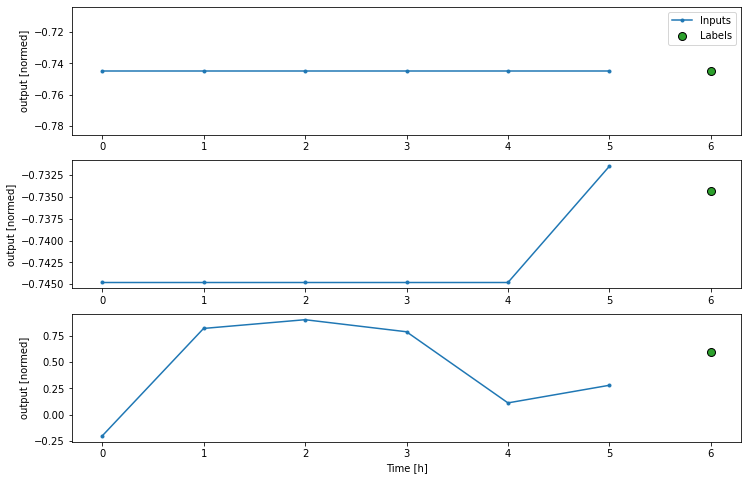

In [48]:
w2.plot() 

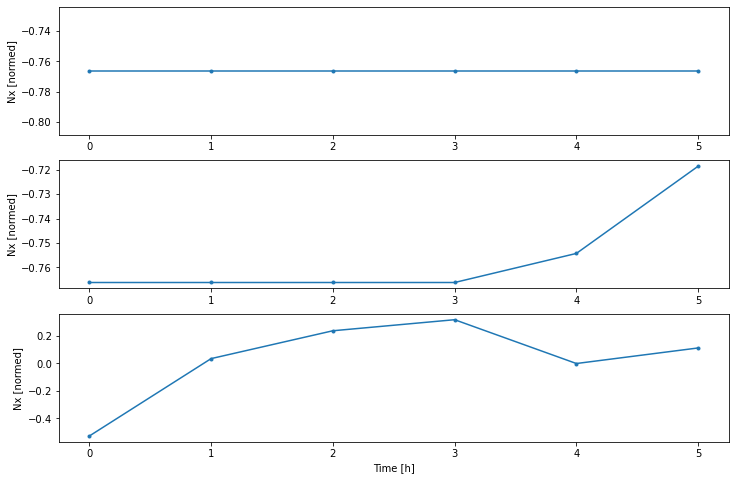

In [49]:
w2.plot(plot_col='Nx')

Finally, this make_dataset method will take a time series DataFrame and convert it to a tf.data.Dataset of (input_window, label_window) pairs using the tf.keras.utils.timeseries_dataset_from_array function:

In [50]:
#Create tf.data.Dataset
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

Finally, this make_dataset method will take a time series DataFrame and convert it to a tf.data.Dataset of (input_window, label_window) pairs using the tf.keras.utils.timeseries_dataset_from_array function:

In [51]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

Now, the WindowGenerator object gives you access to the tf.data.Dataset objects, so you can easily iterate over the data.

The Dataset.element_spec property tells you the structure, data types, and shapes of the dataset elements.

In [52]:
w2.train.element_spec

(TensorSpec(shape=(None, 6, 10), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

Iterating over a Dataset yields concrete batches:

In [53]:
for example_inputs, example_labels in w2.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 6, 10)
Labels shape (batch, time, features): (32, 1, 1)


In [54]:
#Trainning dataset
train_df.head(10)

,output,Temperature,Wind Speed,Nx,Ny,Hx,Day sin,Day cos,months sin,months cos
0,-0.744820,-1.749928,-0.114733,-0.766202,-0.699918,-0.797834,-0.001752,1.413868,-0.052844,1.415260
1,-0.744820,-1.749928,-0.114733,-0.766202,-0.699918,-0.797834,0.364244,1.365683,-0.040474,1.415206
2,-0.744820,-1.749928,-0.059283,-0.766202,-0.699918,-0.797834,0.705299,1.224414,-0.028106,1.415045
3,-0.744820,-1.844035,-0.003834,-0.766202,-0.699918,-0.797834,0.998168,0.999688,-0.015739,1.414776
4,-0.744820,-1.844035,-0.059283,-0.766202,-0.699918,-0.797834,1.222895,0.706819,-0.003375,1.414399
5,-0.744820,-1.844035,-0.281081,-0.766202,-0.699918,-0.797834,1.364164,0.365765,0.008985,1.413915
6,-0.744820,-1.844035,-0.391980,-0.766202,-0.699918,-0.797834,1.412349,-0.000231,0.021340,1.413324
7,-0.744820,-1.844035,-0.391980,-0.766202,-0.699918,-0.797834,1.364164,-0.366226,0.033690,1.412625
8,-0.689166,-1.749928,-0.114733,-0.670848,-0.362379,-0.797834,1.222895,-0.707280,0.046033,1.411818
9,-0.417866,-1.655822,0.162514,-0.441403,0.397085,-0.750183,0.998168,-1.000149,0.058368,1.410905


In [55]:
for train_inputs, train_labels in w2.train.take(1):
  print(f"Input sample of the one batch:{train_inputs.shape}")
  print(f"label sample of the one batch:{train_labels.shape}")
  print(train_inputs)
  print(train_labels)

Input sample of the one batch:(32, 6, 10)
label sample of the one batch:(32, 1, 1)
tf.Tensor(
[[[ 1.4678010e+00  1.1673683e+00 -4.4742933e-01 ... -1.2248757e+00
   -1.2139511e+00  8.1283844e-01]
  [ 1.2949106e+00  1.2614746e+00 -3.3653051e-01 ... -1.3661447e+00
   -1.2068120e+00  8.2290632e-01]
  [ 1.9368722e+00  1.3555809e+00 -1.1473289e-01 ... -1.4143289e+00
   -1.1995852e+00  8.3291167e-01]
  [ 1.9061097e+00  1.4496872e+00  5.1615331e-02 ... -1.3661447e+00
   -1.1922709e+00  8.4285378e-01]
  [ 1.7098639e+00  1.4496872e+00  2.1796356e-01 ... -1.2248757e+00
   -1.1848699e+00  8.5273194e-01]
  [ 1.3246027e+00  1.3555809e+00  2.7341297e-01 ... -1.0001491e+00
   -1.1773827e+00  8.6254531e-01]]

 [[-7.1364254e-02  8.8504922e-01 -3.3653051e-01 ... -3.6622617e-01
    1.2659769e+00  5.2029711e-01]
  [-5.6262416e-01  6.9683659e-01 -7.8012580e-01 ... -2.3060964e-04
    1.2704601e+00  5.0880694e-01]
  [-7.4481970e-01  5.0862390e-01 -1.0019234e+00 ...  3.6576495e-01
    1.2748425e+00  4.9727827e

In [56]:
test_df.head(10)

,output,Temperature,Wind Speed,Nx,Ny,Hx,Day sin,Day cos,months sin,months cos
7884,2.180917,-0.808865,2.768636,1.179614,-0.067032,1.897096,-0.001752,-1.414329,-0.490860,1.346116
7885,2.180719,-0.742990,2.546839,1.093200,-0.088128,1.878565,-0.367748,-1.366145,-0.479079,1.349874
7886,1.856333,-0.733580,2.325041,0.813097,-0.130320,1.796499,-0.708802,-1.224876,-0.467266,1.353530
7887,1.279354,-0.771222,1.992345,0.372086,-0.183061,1.619131,-1.001672,-1.000149,-0.455421,1.357083
7888,0.434669,-0.902971,1.271502,-0.185139,-0.309638,1.224687,-1.226399,-0.707280,-0.443546,1.360533
7889,1.471530,-0.997078,0.717008,-0.703626,-0.541697,-0.175724,-1.367668,-0.366226,-0.431641,1.363879
7890,-0.744820,-1.317039,-0.281081,-0.766202,-0.699918,-0.797834,-1.415852,-0.000231,-0.419707,1.367122
7891,-0.744820,-1.439377,-0.558328,-0.766202,-0.699918,-0.797834,-1.367668,0.365765,-0.407745,1.370261
7892,-0.744820,-1.552305,-0.835575,-0.766202,-0.699918,-0.797834,-1.226399,0.706819,-0.395756,1.373296
7893,-0.744820,-1.637001,-1.057373,-0.766202,-0.699918,-0.797834,-1.001672,0.999688,-0.383741,1.376226


In [57]:
for test_inputs, test_labels in w2.test.take(1):
  print(test_inputs)
  print(test_labels)

tf.Tensor(
[[[ 6.9755429e-01 -1.5012048e-01  1.0497047e+00 ... -1.4143289e+00
    6.5588140e-01  1.2259898e+00]
  [ 1.3313282e+00  1.3219853e-01  1.2160529e+00 ... -1.3661447e+00
    6.6656667e-01  1.2197791e+00]
  [ 1.0398383e+00  2.2630487e-01  1.1051540e+00 ... -1.2248757e+00
    6.7719710e-01  1.2134757e+00]
  [ 1.2385179e+00  3.8092196e-02  2.7341297e-01 ... -1.0001491e+00
    6.8777198e-01  1.2070801e+00]
  [ 8.5198510e-01 -3.3833316e-01 -5.0287873e-01 ... -7.0727974e-01
    6.9829047e-01  1.2005928e+00]
  [ 2.1598375e-01 -6.2065220e-01 -6.1377758e-01 ... -3.6622617e-01
    7.0875174e-01  1.1940142e+00]]

 [[ 1.1778899e+00 -5.9242028e-01 -4.4742933e-01 ... -1.0001491e+00
   -1.6405563e-01  1.4109048e+00]
  [ 3.8165638e-01 -8.1827551e-01 -9.4647402e-01 ... -7.0727974e-01
   -1.5172009e-01  1.4118185e+00]
  [ 1.4657049e+00 -1.0064882e+00 -1.3346199e+00 ... -3.6622617e-01
   -1.3937703e-01  1.4126247e+00]
  [-7.4481970e-01 -1.3170391e+00 -1.0573728e+00 ... -2.3060964e-04
   -1.27027

Single step models
The simplest model you can build on this sort of data is one that predicts a single feature's value—1 time step (one hour) into the future based only on the current conditions.

So, start by building models to predict the power output value one hour into the future.

In [58]:

# Making window for single step model
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['output'])
single_step_window


Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['output']

Configure a WindowGenerator object to produce these single-step (input, label) pairs:

In [59]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 10)
Labels shape (batch, time, features): (32, 1, 1)


                                                 Baseline model


In [60]:
#performance baseline model
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

Instantiate and evaluate this model:

In [61]:
baseline = Baseline(label_index=column_indices['output'])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

55/55 [==============================] - 0s 924us/step - loss: 0.2233 - mean_absolute_error: 0.2540


That printed some performance metrics, but those don't give you a feeling for how well the model is doing.

The WindowGenerator has a plot method, but the plots won't be very interesting with only a single sample.

So, create a wider WindowGenerator that generates windows 24 hours of consecutive inputs and labels at a time. The new wide_window variable doesn't change the way the model operates. The model still makes predictions one hour into the future based on a single input time step. Here, the time axis acts like the batch axis: each prediction is made independently with no interaction between time steps:

In [62]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['output'])

wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['output']

This expanded window can be passed directly to the same baseline model without any code changes. This is possible because the inputs and labels have the same number of time steps, and the baseline just forwards the input to the output:

In [63]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 24, 10)
Output shape: (32, 24, 1)


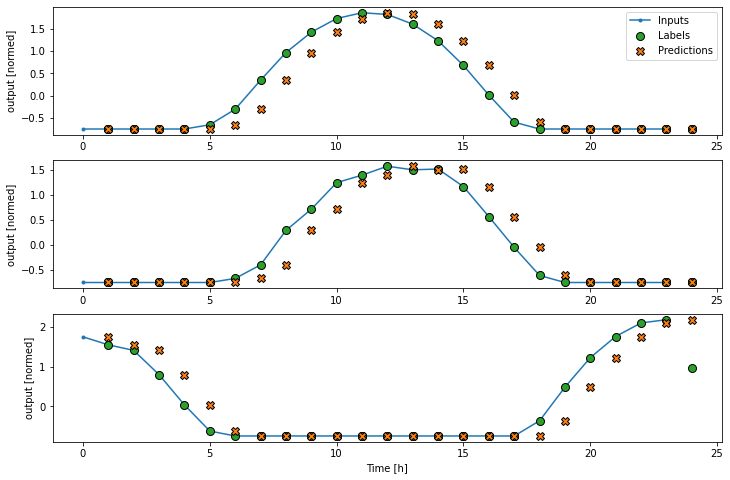

In [64]:
#Plotting the baseline model's predictions you can see that it is simply the labels, shifted right by 1h.
wide_window.plot(baseline)

The blue Inputs line shows the input output at each time step. The model receives all features, this plot only shows the output.
The green Labels dots show the target prediction value. These dots are shown at the prediction time, not the input time. That is why the range of labels is shifted 1 step relative to the inputs.
The orange Predictions crosses are the model's prediction's for each output time step. If the model were predicting perfectly the predictions would land directly on the Labels.

A tf.keras.layers.Dense layer with no activation set is a linear model. The layer only transforms the last axis of the data from (batch, time, inputs) to (batch, time, units); it is applied independently to every item across the batch and time axes.

In [65]:
#Simple linear model
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1) # only one neuron with no activation meaning only linear function
])

In [66]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

Input shape: (32, 1, 10)
Output shape: (32, 1, 1)


In [67]:
MAX_EPOCHS = 200

def compile_and_fit(model, window, patience=5):
  # If after 2 epochs, the loss is not imporoved, we have to stop 
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')
  # Set loss, optimizer, and matrices
  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])
  log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
 
  # Training start
  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping,tensorboard_callback])
  return history

In [68]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/200
192/192 [==============================] - 1s 3ms/step - loss: 0.8203 - mean_absolute_error: 0.7139 - val_loss: 0.4806 - val_mean_absolute_error: 0.5417
Epoch 2/200
192/192 [==============================] - 0s 1ms/step - loss: 0.4205 - mean_absolute_error: 0.5079 - val_loss: 0.2884 - val_mean_absolute_error: 0.4121
Epoch 3/200
192/192 [==============================] - 0s 1ms/step - loss: 0.2443 - mean_absolute_error: 0.3836 - val_loss: 0.1998 - val_mean_absolute_error: 0.3343
Epoch 4/200
192/192 [==============================] - 0s 1ms/step - loss: 0.1617 - mean_absolute_error: 0.3092 - val_loss: 0.1635 - val_mean_absolute_error: 0.2949
Epoch 5/200
192/192 [==============================] - 0s 1ms/step - loss: 0.1270 - mean_absolute_error: 0.2718 - val_loss: 0.1511 - val_mean_absolute_error: 0.2791
Epoch 6/200
192/192 [==============================] - 0s 1ms/step - loss: 0.1140 - mean_absolute_error: 0.2568 - val_loss: 0.1476 - val_mean_absolute_error: 0.2769
Epoch 7/20

Like the baseline model, the linear model can be called on batches of wide windows. Used this way the model makes a set of independent predictions on consecutive time steps. The time axis acts like another batch axis. There are no interactions between the predictions at each time step.

In [69]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 24, 10)
Output shape: (32, 24, 1)


In [70]:
linear

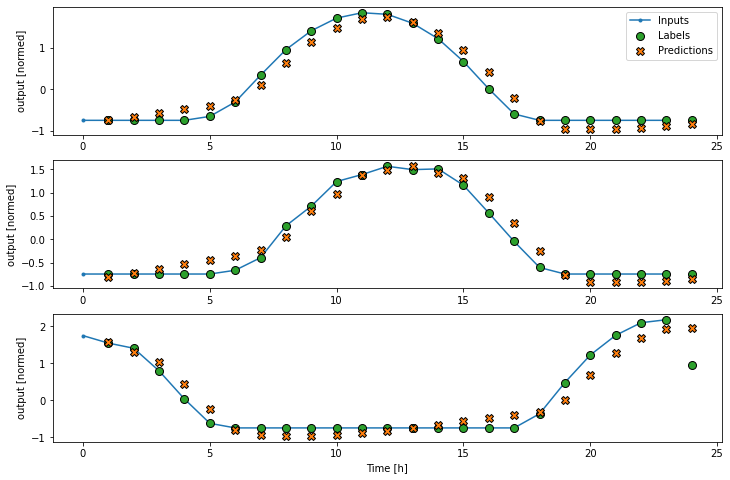

In [71]:
wide_window.plot(linear) 

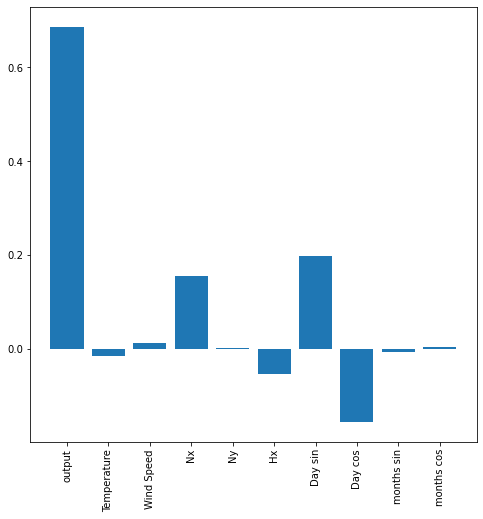

In [72]:
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

In [73]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'), # 64 neurons with linear function + activation function 
    tf.keras.layers.Dense(units=64, activation='relu'), # same as above
    tf.keras.layers.Dense(units=1) # On Final layer, only one neuron with no activation function
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

Epoch 1/200
192/192 [==============================] - 1s 3ms/step - loss: 0.1325 - mean_absolute_error: 0.2142 - val_loss: 0.0899 - val_mean_absolute_error: 0.1486
Epoch 2/200
192/192 [==============================] - 0s 2ms/step - loss: 0.0550 - mean_absolute_error: 0.1209 - val_loss: 0.0905 - val_mean_absolute_error: 0.1470
Epoch 3/200
192/192 [==============================] - 0s 2ms/step - loss: 0.0520 - mean_absolute_error: 0.1136 - val_loss: 0.0864 - val_mean_absolute_error: 0.1348
Epoch 4/200
192/192 [==============================] - 0s 2ms/step - loss: 0.0503 - mean_absolute_error: 0.1121 - val_loss: 0.0865 - val_mean_absolute_error: 0.1552
Epoch 5/200
192/192 [==============================] - 0s 2ms/step - loss: 0.0492 - mean_absolute_error: 0.1110 - val_loss: 0.0864 - val_mean_absolute_error: 0.1418
Epoch 6/200
192/192 [==============================] - 0s 1ms/step - loss: 0.0486 - mean_absolute_error: 0.1087 - val_loss: 0.0883 - val_mean_absolute_error: 0.1435
Epoch 7/20

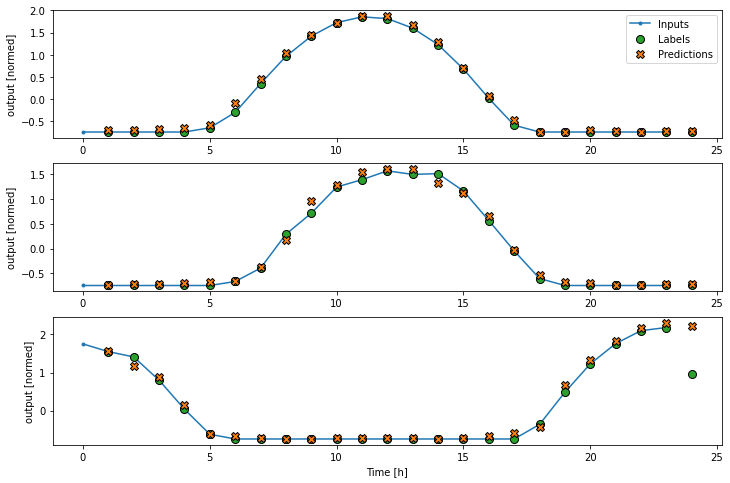

In [74]:
wide_window.plot(dense) # inputs, labels = self.example


In [75]:
CONV_WIDTH = 3
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['output'])

conv_window

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['output']

Text(0.5, 1.0, 'Given 3h as input, predict 1h into the future.')

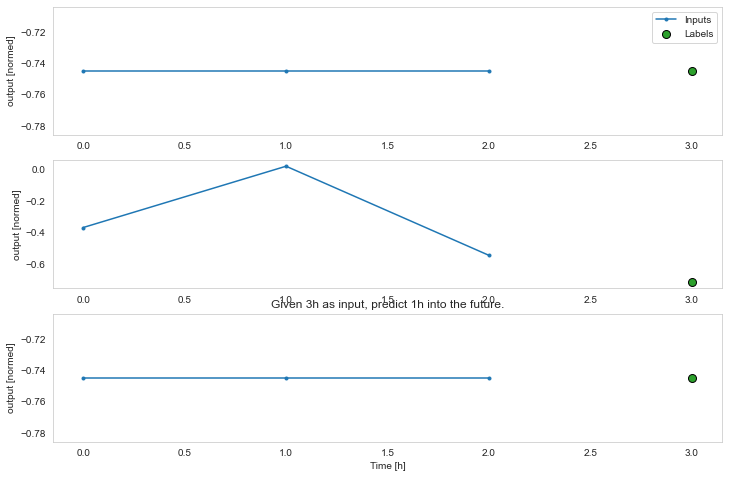

In [686]:
conv_window.plot()
plt.title("Given 3h as input, predict 1h into the future.")

In [76]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

In [77]:
print('Input shape(batch,time,features):', conv_window.example[0].shape)
print('Output shape:', multi_step_dense(conv_window.example[0]).shape)

Input shape(batch,time,features): (32, 3, 10)
Output shape: (32, 1, 1)


In [78]:
history = compile_and_fit(multi_step_dense, conv_window)

IPython.display.clear_output()
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)

55/55 [==============================] - 0s 781us/step - loss: 0.0854 - mean_absolute_error: 0.1361


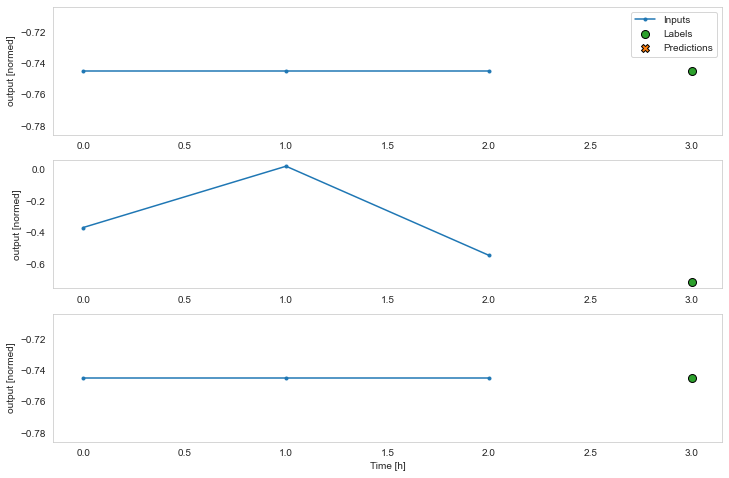

In [690]:
conv_window.plot(multi_step_dense)

In [691]:
print('Input shape:', wide_window.example[0].shape)
try:
  print('Output shape:', multi_step_dense(wide_window.example[0]).shape)
except Exception as e:
  print(f'\n{type(e).__name__}:{e}')

Input shape: (32, 24, 10)

ValueError:Exception encountered when calling layer "sequential_62" (type Sequential).

Input 0 of layer "dense_105" is incompatible with the layer: expected axis -1 of input shape to have value 30, but received input with shape (32, 240)

Call arguments received:
  • inputs=tf.Tensor(shape=(32, 24, 10), dtype=float32)
  • training=None
  • mask=None


In [79]:
#cnn
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

In [80]:
print("Conv model on `conv_window`")
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)

Conv model on `conv_window`
Input shape: (32, 3, 10)
Output shape: (32, 1, 1)


In [81]:
#Train and evaluate it on the conv_window and it should give performance similar to the multi_step_dense model.
history = compile_and_fit(conv_model, conv_window)

IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

55/55 [==============================] - 0s 833us/step - loss: 0.0831 - mean_absolute_error: 0.1281


In [82]:
print("Wide window")
print('Input shape:', wide_window.example[0].shape)
print('Labels shape:', wide_window.example[1].shape)
print('Output shape:', conv_model(wide_window.example[0]).shape)

Wide window
Input shape: (32, 24, 10)
Labels shape: (32, 24, 1)
Output shape: (32, 22, 1)


In [83]:
LABEL_WIDTH = 24
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['output'])

wide_conv_window

Total window size: 27
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
Label indices: [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26]
Label column name(s): ['output']

In [84]:
print("Wide conv window")
print('Input shape:', wide_conv_window.example[0].shape)
print('Labels shape:', wide_conv_window.example[1].shape)
print('Output shape:', conv_model(wide_conv_window.example[0]).shape)

Wide conv window
Input shape: (32, 26, 10)
Labels shape: (32, 24, 1)
Output shape: (32, 24, 1)


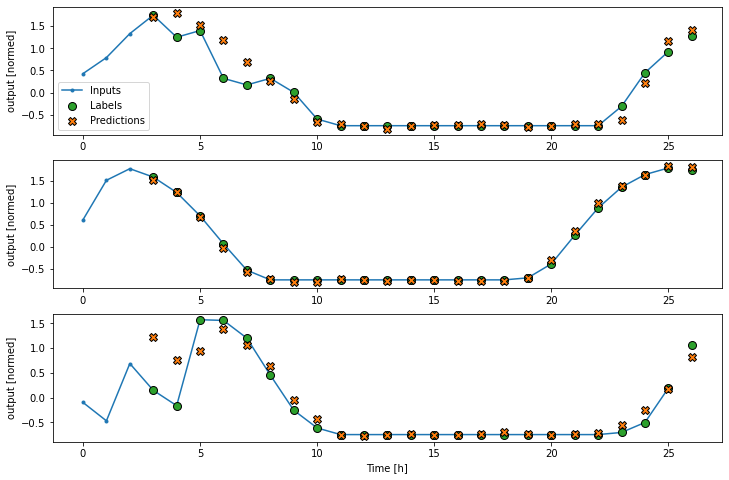

In [85]:
wide_conv_window.plot(conv_model)

In [86]:
#lstm
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [87]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (32, 24, 10)
Output shape: (32, 24, 1)


In [88]:
wide_conv_window

Total window size: 27
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
Label indices: [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26]
Label column name(s): ['output']

In [89]:
history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

54/54 [==============================] - 0s 3ms/step - loss: 0.0826 - mean_absolute_error: 0.1277


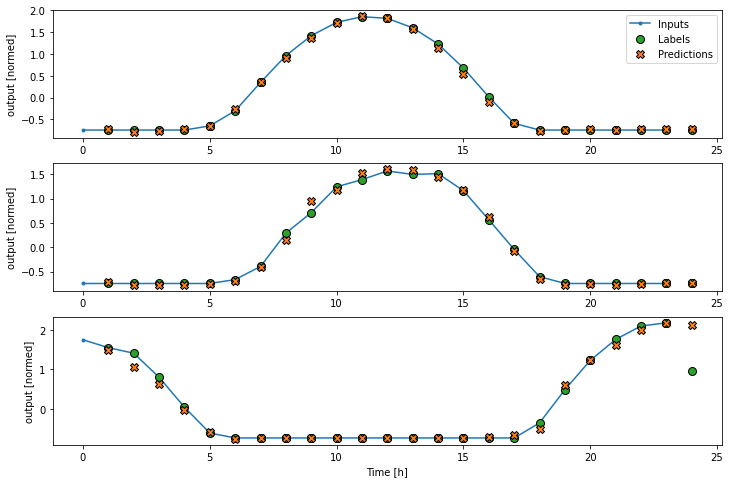

In [90]:
wide_window.plot(lstm_model)

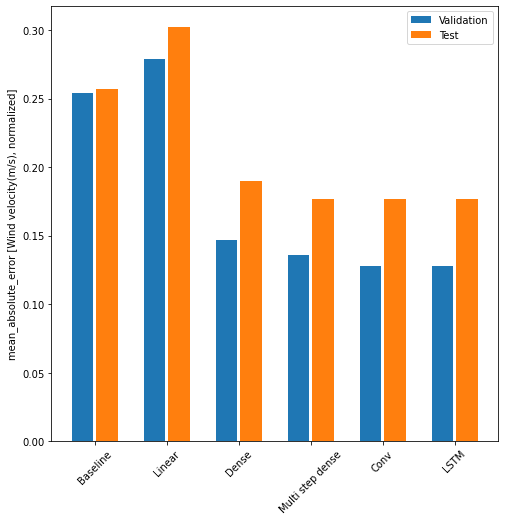

In [91]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [Wind velocity(m/s), normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

In [92]:
single_step_window = WindowGenerator(
    # `WindowGenerator` returns all features as labels if you 
    # don't set the `label_columns` argument.
    input_width=1, label_width=1, shift=1)

wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1)

for example_inputs, example_labels in wide_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 24, 10)
Labels shape (batch, time, features): (32, 24, 10)


In [93]:
baseline = Baseline()
baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

In [94]:
val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(wide_window.val)
performance['Baseline'] = baseline.evaluate(wide_window.test, verbose=0)

54/54 [==============================] - 0s 582us/step - loss: 0.0853 - mean_absolute_error: 0.1601


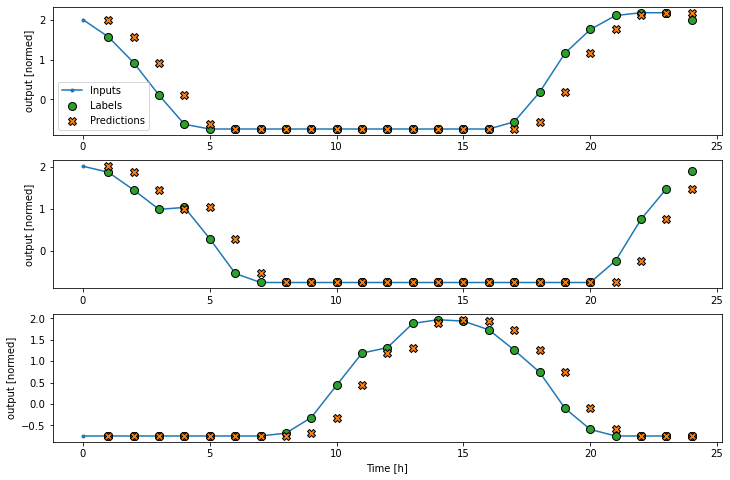

In [95]:
wide_window.plot(baseline)

In [96]:
#dense
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=num_features)
    ])

In [97]:
history = compile_and_fit(dense, single_step_window)

IPython.display.clear_output()
val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

55/55 [==============================] - 0s 1ms/step - loss: 0.0343 - mean_absolute_error: 0.0901


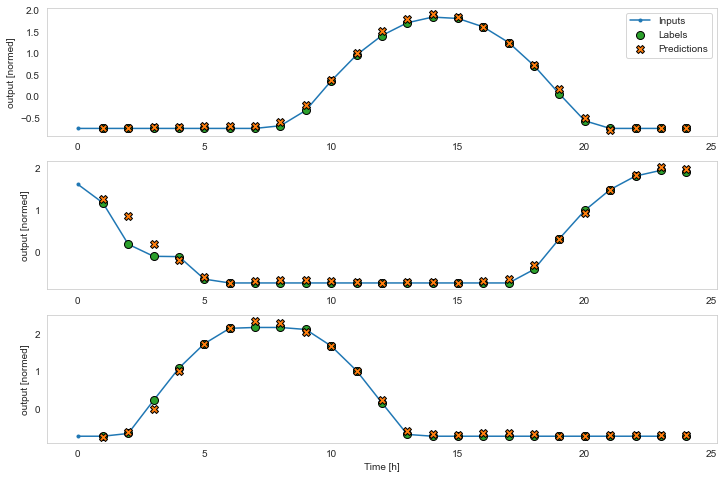

In [467]:
wide_window.plot(dense)

In [98]:
%%time
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1)

lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=num_features)
])

history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate( wide_window.val)
performance['LSTM'] = lstm_model.evaluate( wide_window.test, verbose=0)

print()

54/54 [==============================] - 0s 3ms/step - loss: 0.0308 - mean_absolute_error: 0.0793

Wall time: 46.1 s


In [99]:
class ResidualWrapper(tf.keras.Model):
  def __init__(self, model):
    super().__init__()
    self.model = model

  def call(self, inputs, *args, **kwargs):
    delta = self.model(inputs, *args, **kwargs)

    # The prediction for each timestep is the input
    # from the previous time step plus the delta
    # calculated by the model.
    return inputs + delta

In [100]:
%%time
residual_lstm = ResidualWrapper(
    tf.keras.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dense(
        num_features,
        # The predicted deltas should start small
        # So initialize the output layer with zeros
        kernel_initializer=tf.initializers.zeros())
]))

history = compile_and_fit(residual_lstm, wide_window)

IPython.display.clear_output()
val_performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.val)
performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.test, verbose=0)
print()

54/54 [==============================] - 0s 3ms/step - loss: 0.0341 - mean_absolute_error: 0.0768

Wall time: 21.5 s


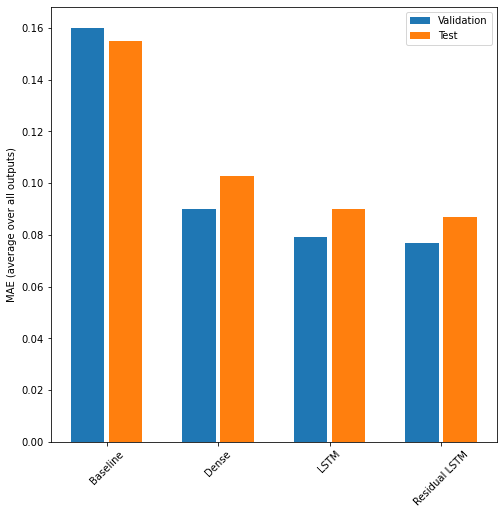

In [101]:
x = np.arange(len(performance))
width = 0.3

metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
plt.ylabel('MAE (average over all outputs)')
_ = plt.legend()

In [102]:
for name, value in performance.items():
  print(f'{name:15s}: {value[1]:0.4f}')

Baseline       : 0.1548
Dense          : 0.1029
LSTM           : 0.0900
Residual LSTM  : 0.0869


Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Label column name(s): None

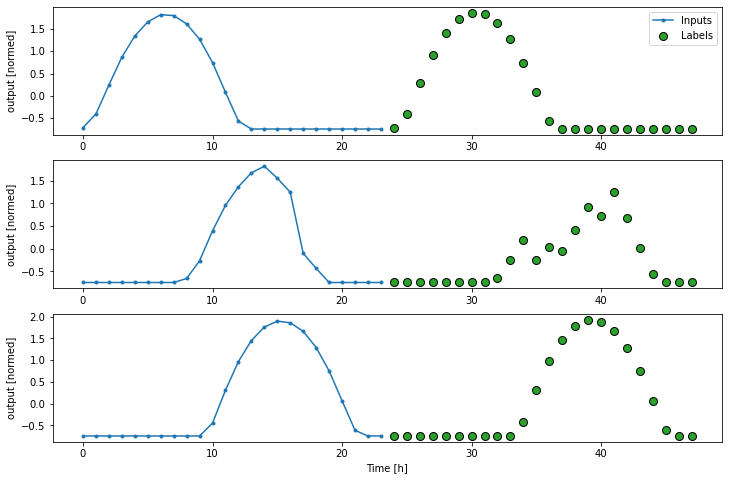

In [103]:
#multistep model
OUT_STEPS = 24
multi_window = WindowGenerator(input_width=24,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)

multi_window.plot()
multi_window

54/54 [==============================] - 0s 864us/step - loss: 1.1952 - mean_absolute_error: 0.7302


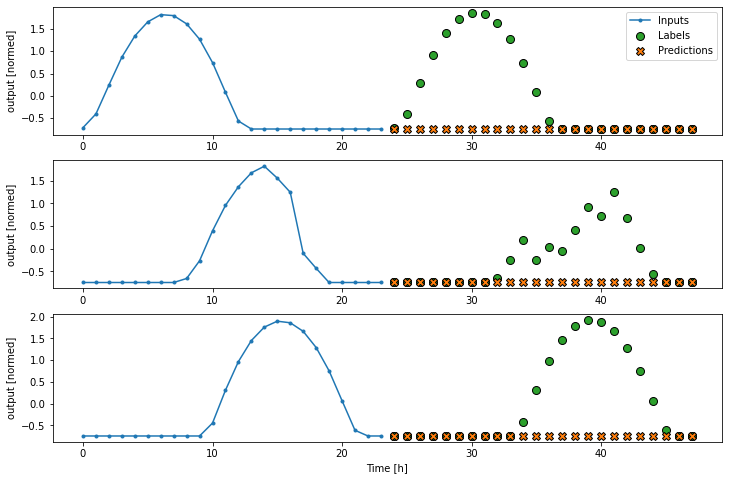

In [105]:
#BASELINEMODEL
class MultiStepLastBaseline(tf.keras.Model):
  def call(self, inputs):
    return tf.tile(inputs[:, -1:, :], [1, OUT_STEPS, 1])

last_baseline = MultiStepLastBaseline()
last_baseline.compile(loss=tf.losses.MeanSquaredError(),
                      metrics=[tf.metrics.MeanAbsoluteError()])

multi_val_performance = {}
multi_performance = {}

multi_val_performance['Last'] = last_baseline.evaluate(multi_window.val)
multi_performance['Last'] = last_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(last_baseline)

54/54 [==============================] - 0s 818us/step - loss: 0.2431 - mean_absolute_error: 0.2290


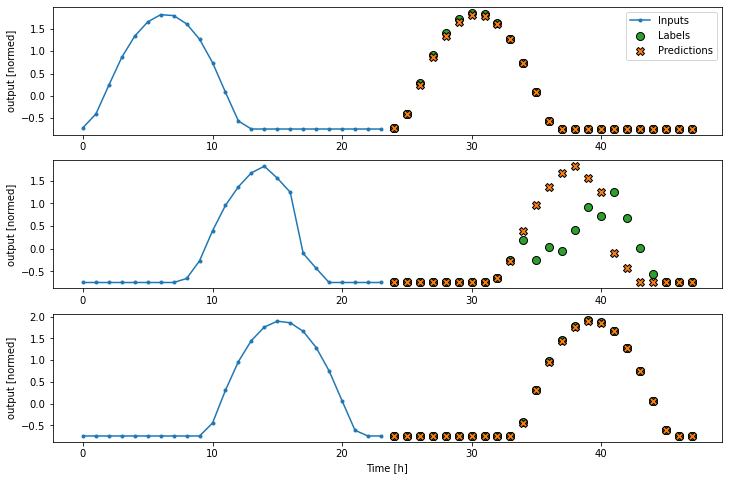

In [106]:

class RepeatBaseline(tf.keras.Model):
  def call(self, inputs):
    return inputs

repeat_baseline = RepeatBaseline()
repeat_baseline.compile(loss=tf.losses.MeanSquaredError(),
                        metrics=[tf.metrics.MeanAbsoluteError()])

multi_val_performance['Repeat'] = repeat_baseline.evaluate(multi_window.val)
multi_performance['Repeat'] = repeat_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(repeat_baseline)

54/54 [==============================] - 0s 1ms/step - loss: 0.1747 - mean_absolute_error: 0.2432


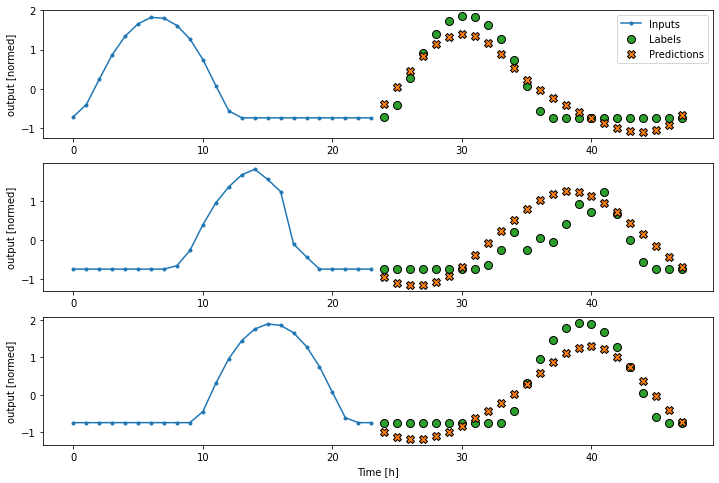

In [108]:
#SINGLE SHOT MODEL
multi_linear_model = tf.keras.Sequential([
    # Take the last time-step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_linear_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Linear'] = multi_linear_model.evaluate(multi_window.val)
multi_performance['Linear'] = multi_linear_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_linear_model)

54/54 [==============================] - 0s 2ms/step - loss: 0.1456 - mean_absolute_error: 0.1999


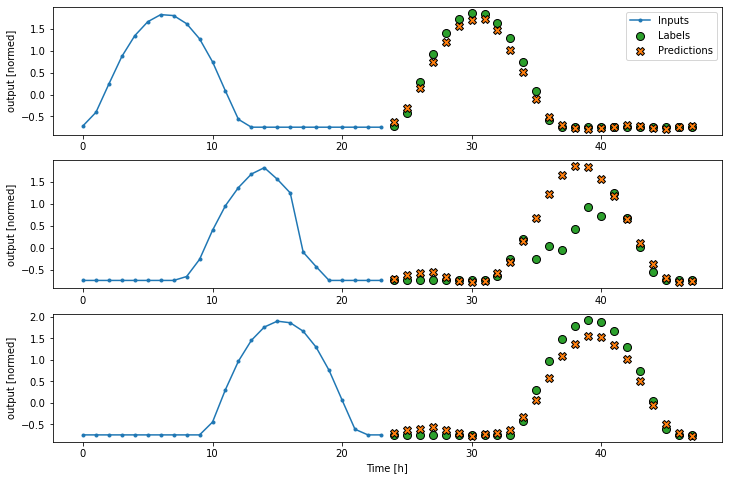

In [109]:
multi_dense_model = tf.keras.Sequential([
    # Take the last time step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, dense_units]
    tf.keras.layers.Dense(512, activation='relu'),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_dense_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Dense'] = multi_dense_model.evaluate(multi_window.val)
multi_performance['Dense'] = multi_dense_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_dense_model)

54/54 [==============================] - 0s 1ms/step - loss: 0.1452 - mean_absolute_error: 0.2027


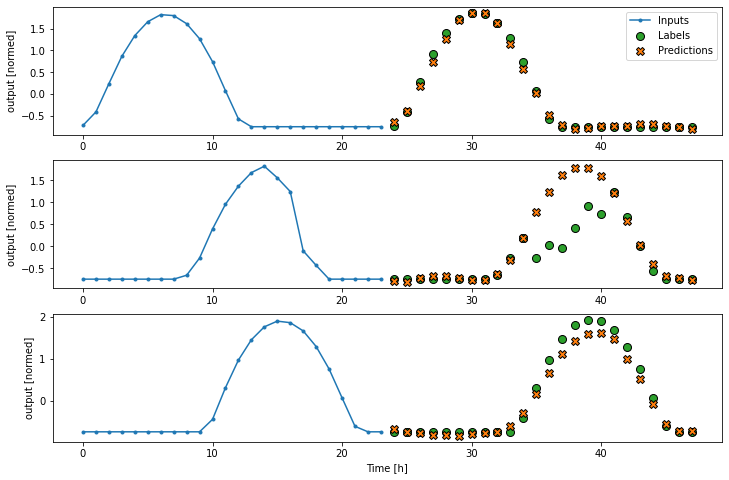

In [110]:
#CNN
CONV_WIDTH = 3
multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_conv_model, multi_window)

IPython.display.clear_output()

multi_val_performance['Conv'] = multi_conv_model.evaluate(multi_window.val)
multi_performance['Conv'] = multi_conv_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_conv_model)

54/54 [==============================] - 0s 3ms/step - loss: 0.1630 - mean_absolute_error: 0.2315


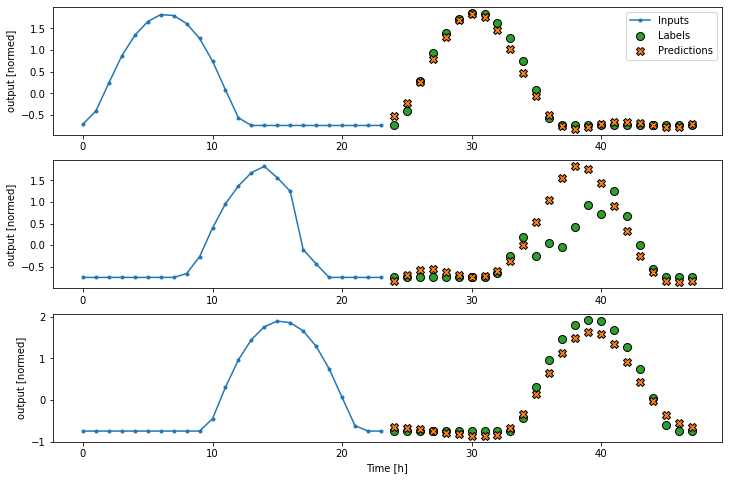

In [111]:
#LSTM
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units]
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)

IPython.display.clear_output()

multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_lstm_model)

In [112]:
#ARIMA-LSTM
class FeedBack(tf.keras.Model):
  def __init__(self, units, out_steps):
    super().__init__()
    self.out_steps = out_steps
    self.units = units
    self.lstm_cell = tf.keras.layers.LSTMCell(units)
    # Also wrap the LSTMCell in an RNN to simplify the `warmup` method.
    self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
    self.dense = tf.keras.layers.Dense(num_features)

In [113]:
feedback_model = FeedBack(units=32, out_steps=OUT_STEPS)

In [114]:
def warmup(self, inputs):
  # inputs.shape => (batch, time, features)
  # x.shape => (batch, lstm_units)
  x, *state = self.lstm_rnn(inputs)

  # predictions.shape => (batch, features)
  prediction = self.dense(x)
  return prediction, state

FeedBack.warmup = warmup

In [115]:
#This method returns a single time-step prediction, and the internal state of the LSTM
prediction, state = feedback_model.warmup(multi_window.example[0])
prediction.shape

TensorShape([32, 10])

In [116]:
def call(self, inputs, training=None):
  # Use a TensorArray to capture dynamically unrolled outputs.
  predictions = []
  # Initialize the lstm state
  prediction, state = self.warmup(inputs)

  # Insert the first prediction
  predictions.append(prediction)

  # Run the rest of the prediction steps
  for n in range(1, self.out_steps):
    # Use the last prediction as input.
    x = prediction
    # Execute one lstm step.
    x, state = self.lstm_cell(x, states=state,
                              training=training)
    # Convert the lstm output to a prediction.
    prediction = self.dense(x)
    # Add the prediction to the output
    predictions.append(prediction)

  # predictions.shape => (time, batch, features)
  predictions = tf.stack(predictions)
  # predictions.shape => (batch, time, features)
  predictions = tf.transpose(predictions, [1, 0, 2])
  return predictions

FeedBack.call = call

In [117]:
#Test Run on the examples input
print('Output shape (batch, time, features): ', feedback_model(multi_window.example[0]).shape)

Output shape (batch, time, features):  (32, 24, 10)


54/54 [==============================] - 0s 4ms/step - loss: 0.2094 - mean_absolute_error: 0.2567


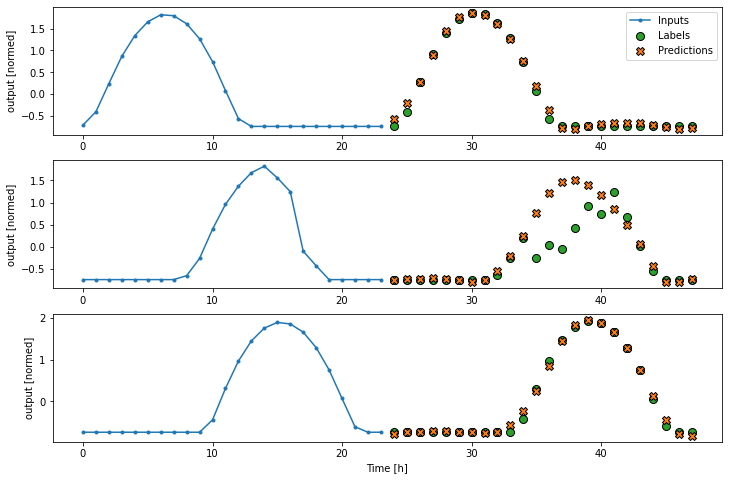

In [118]:
#Trainning the model
history = compile_and_fit(feedback_model, multi_window)

IPython.display.clear_output()

multi_val_performance['AR LSTM'] = feedback_model.evaluate(multi_window.val)
multi_performance['AR LSTM'] = feedback_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(feedback_model)


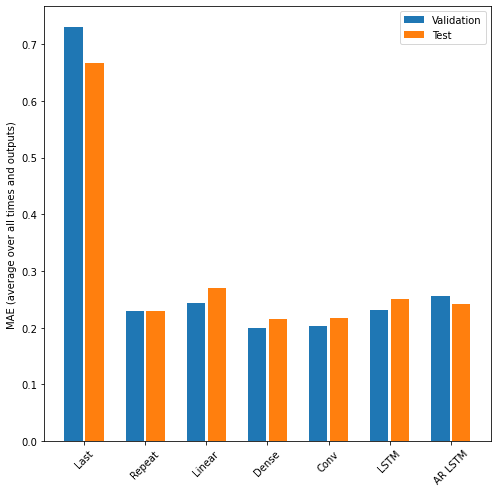

In [120]:
x = np.arange(len(multi_performance))
width = 0.3


metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in multi_val_performance.values()]
test_mae = [v[metric_index] for v in multi_performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=multi_performance.keys(),
           rotation=45)
plt.ylabel(f'MAE (average over all times and outputs)')
_ = plt.legend()

In [121]:
for name, value in multi_performance.items():
  print(f'{name:8s}: {value[1]:0.4f}')

Last    : 0.6661
Repeat  : 0.2293
Linear  : 0.2701
Dense   : 0.2151
Conv    : 0.2178
LSTM    : 0.2502
AR LSTM : 0.2421
